In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
!pip install pandas-datareader

distributed 1.21.8 requires msgpack, which is not installed.
grin 1.2.1 requires argparse>=1.1, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import DataReader

In [5]:
from datetime import datetime

In [6]:
from __future__ import division

In [7]:
temp_AAPL = pd.read_csv('./price-volume-data-for-all-us-stocks-etfs/Data/Stocks/aapl.us.txt')
temp_GOOG = pd.read_csv('./price-volume-data-for-all-us-stocks-etfs/Data/Stocks/goog.us.txt')
temp_MSFT = pd.read_csv( './price-volume-data-for-all-us-stocks-etfs/Data/Stocks/msft.us.txt')
temp_AMZN = pd.read_csv('./price-volume-data-for-all-us-stocks-etfs/Data/Stocks/amzn.us.txt')


In [8]:
AAPL = temp_AAPL[(temp_AAPL['Date']>'2017-00-00')]
GOOG = temp_GOOG[(temp_GOOG['Date']>'2017-00-00')]
MSFT = temp_MSFT[(temp_MSFT['Date']>'2017-00-00')]
AMZN = temp_AMZN[(temp_AMZN['Date']>'2017-00-00')]

In [9]:
AAPL.reset_index(drop=True, inplace=True)
AAPL.set_index('Date', inplace=True)

GOOG.reset_index(drop=True, inplace=True)
GOOG.set_index('Date', inplace=True)

MSFT.reset_index(drop=True, inplace=True)
MSFT.set_index('Date', inplace=True)

AMZN.reset_index(drop=True, inplace=True)
AMZN.set_index('Date', inplace=True)

In [10]:
AAPL.describe()

,Open,High,Low,Close,Volume,OpenInt
count,218.000000,218.000000,218.000000,218.000000,2.180000e+02,218.0
mean,145.998440,146.932706,145.061972,146.111101,2.700632e+07,0.0
std,13.412919,13.492815,13.095781,13.273582,1.175763e+07,0.0
min,113.970000,114.490000,112.930000,114.190000,1.422849e+07,0.0
25%,139.302500,139.955000,138.472500,139.107500,2.012100e+07,0.0
50%,146.625000,147.800000,145.110000,147.430000,2.409021e+07,0.0
75%,155.775000,156.670000,154.535000,155.400000,3.006879e+07,0.0
max,175.110000,175.610000,174.270000,175.610000,1.120360e+08,0.0


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218 entries, 2017-01-03 to 2017-11-10
Data columns (total 6 columns):
Open       218 non-null float64
High       218 non-null float64
Low        218 non-null float64
Close      218 non-null float64
Volume     218 non-null int64
OpenInt    218 non-null int64
dtypes: float64(4), int64(2)
memory usage: 11.9+ KB


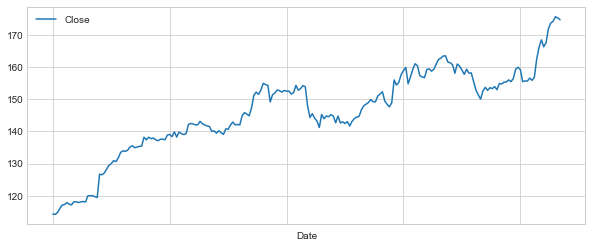

In [12]:
AAPL['Close'].plot(legend=True, figsize=(10,4))

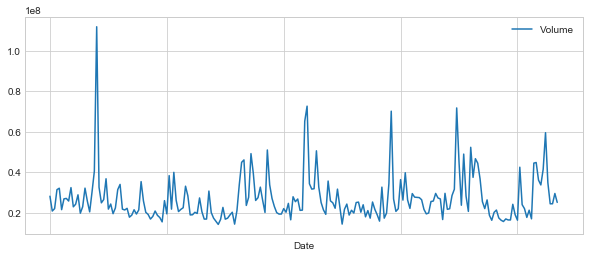

In [13]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [14]:
# Taking the moving average, taking subsets of the data and using the means of those intervals instead of every single point of data.
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Close'].rolling(ma).mean()

C:\Users\jeson\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [15]:
AAPL

,Open,High,Low,Close,Volume,OpenInt,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2017-01-03,113.97,114.49,112.93,114.31,28186251,0,NaN,NaN,NaN
2017-01-04,114.02,114.67,113.92,114.19,20850505,0,NaN,NaN,NaN
2017-01-05,114.09,115.02,113.98,114.77,22044719,0,NaN,NaN,NaN
2017-01-06,114.94,116.29,114.63,116.04,31419514,0,NaN,NaN,NaN
2017-01-09,116.08,117.54,116.07,117.11,32145605,0,NaN,NaN,NaN
2017-01-10,116.89,117.49,116.43,117.23,21526096,0,NaN,NaN,NaN
2017-01-11,116.86,118.03,116.72,117.86,26871766,0,NaN,NaN,NaN
2017-01-12,117.01,117.41,116.34,117.37,27099166,0,NaN,NaN,NaN
2017-01-13,117.23,117.73,116.93,117.16,25804433,0,NaN,NaN,NaN


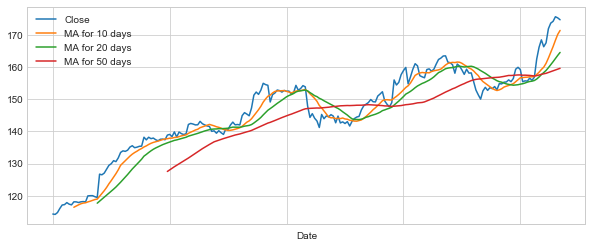

In [16]:
AAPL[['Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,4))
# Notice that as we take the moving averages for longer windows, we get smoother lines. It's not as reliant on the daily fluctuations for its general trend.
# Moving average shouldn't be relied for a 100% accurate representation of future behaviour.
# Simplifies data and makes it easier to isolate trends. 

C:\Users\jeson\Anaconda2\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\jeson\Anaconda2\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


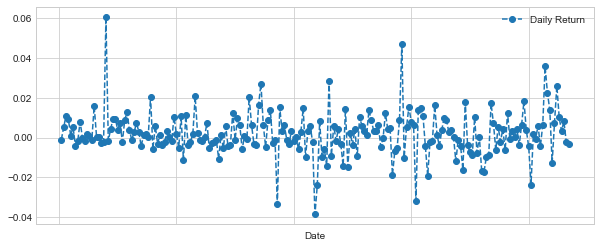

In [17]:
# Daily returns and risks of stocks. Taking a look at daily changes of stocks, not just aboslute values.
AAPL.loc[:, 'Daily Return'] = AAPL['Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')
# Daily returns. This tells us the percent return of our money on any given day. If we bought stock in the beginning of the day, did we gain money (+%), or lose money (-%)?  

C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


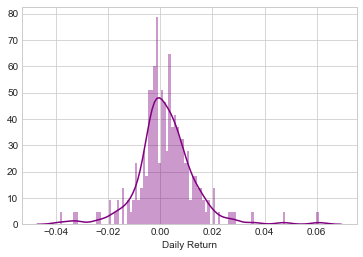

In [18]:
# Average daily return using histograms.
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple') # Let's use layer 2 plots. A KDE plot and a histogram.
# Histogram of daily returns. Skewed a bit on the positive side.

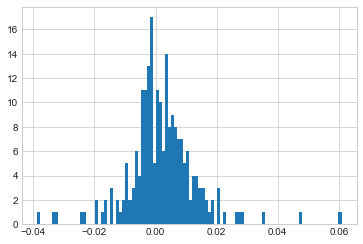

In [19]:
AAPL['Daily Return'].hist(bins=100)

In [20]:
tech_list = [AAPL, GOOG, MSFT, AMZN]
AAPL.name = 'AAPL'
GOOG.name = 'GOOG'
MSFT.name = 'MSFT'
AMZN.name = 'AMZN'

closing_df = pd.DataFrame(columns=['AAPL', 'GOOG', 'MSFT', 'AMZN'], index=list(AAPL.index.values))

In [21]:
for df in tech_list:
    closing_df[df.name] = df['Close'] 

In [22]:
closing_df

,AAPL,GOOG,MSFT,AMZN
2017-01-03,114.31,786.140,61.520,753.67
2017-01-04,114.19,786.900,61.246,757.18
2017-01-05,114.77,794.030,61.246,780.45
2017-01-06,116.04,806.150,61.776,795.99
2017-01-09,117.11,806.650,61.580,796.92
2017-01-10,117.23,804.800,61.560,795.90
2017-01-11,117.86,807.910,62.120,799.02
2017-01-12,117.37,806.360,61.550,813.64
2017-01-13,117.16,807.880,61.639,817.24
2017-01-17,118.10,804.610,61.471,809.72


In [23]:
tech_rets = closing_df.pct_change()

In [24]:
tech_rets.head()

,AAPL,GOOG,MSFT,AMZN
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,-0.001050,0.000967,-0.004454,0.004657
2017-01-05,0.005079,0.009061,0.000000,0.030732
2017-01-06,0.011066,0.015264,0.008654,0.019912
2017-01-09,0.009221,0.000620,-0.003173,0.001168


C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


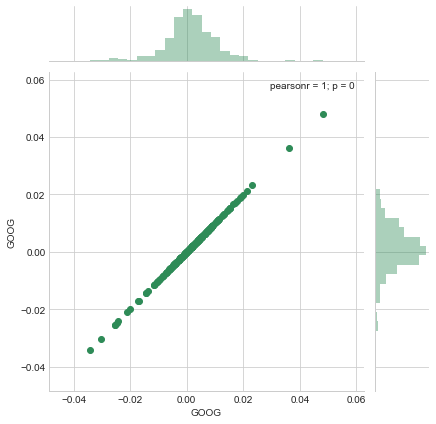

In [25]:
# Comparing daily return percentages, we can see correlations between stocks.
# Comparing Google to itself. We expect a correlation of 1.
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen') # Joint plots join 2 plots. Histogram and anything else. In this case we use scatter.
# Pearson R is the correlation variable name.

C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


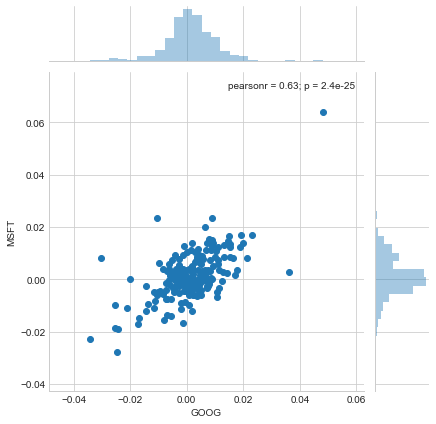

In [26]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')
# Pearson Product-Moment Correlation Coefficient = 0.63. Fairly correlated.

In [27]:
tech_rets.head()

,AAPL,GOOG,MSFT,AMZN
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,-0.001050,0.000967,-0.004454,0.004657
2017-01-05,0.005079,0.009061,0.000000,0.030732
2017-01-06,0.011066,0.015264,0.008654,0.019912
2017-01-09,0.009221,0.000620,-0.003173,0.001168


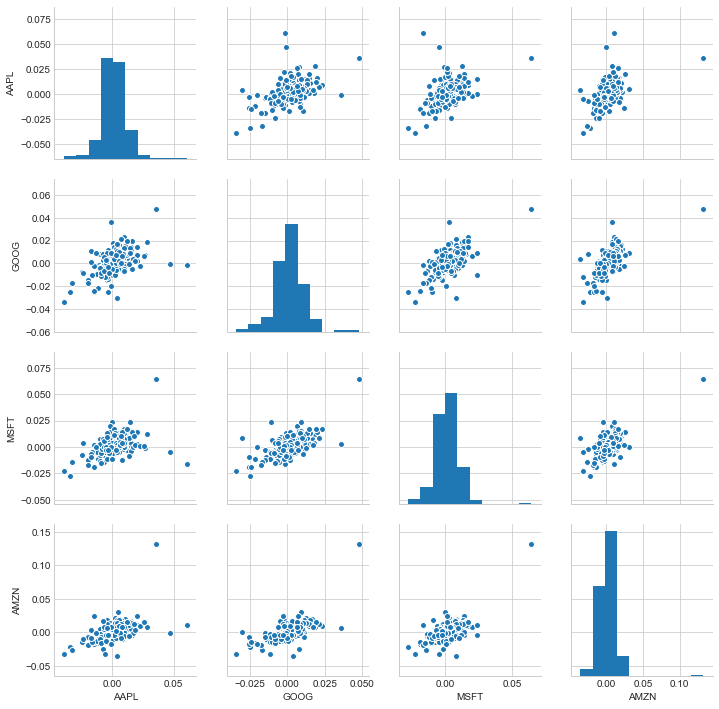

In [28]:
sns.pairplot(tech_rets.dropna())
# Just by eye-balling, GOOG and AMZN have a correlation.

C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


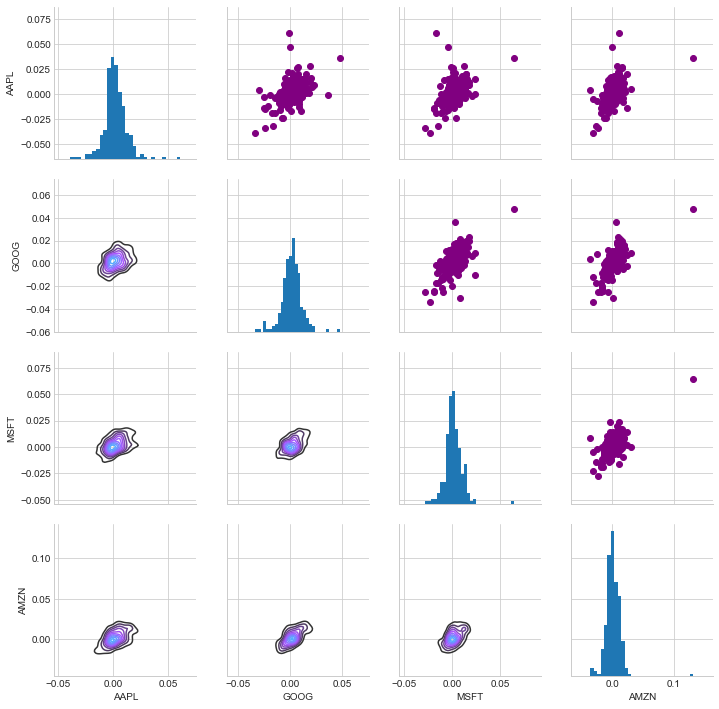

In [29]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


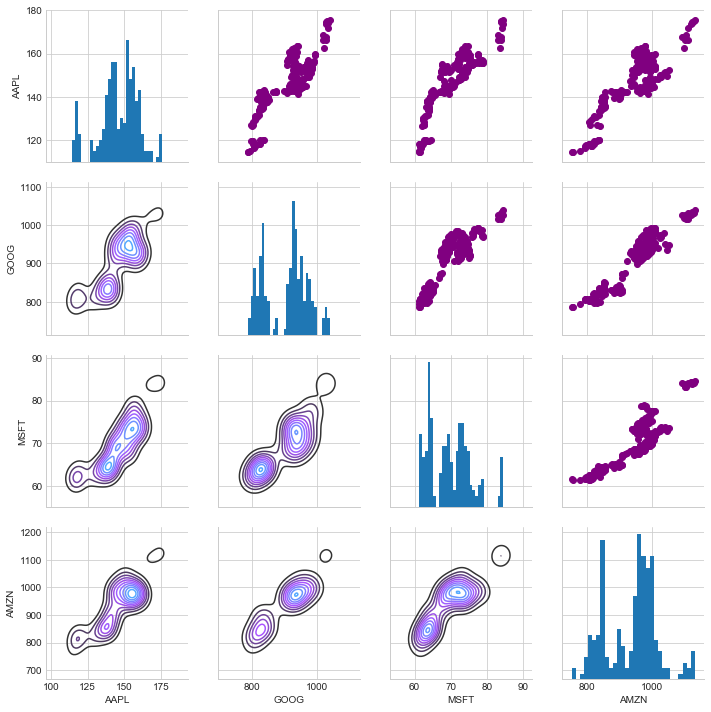

In [30]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

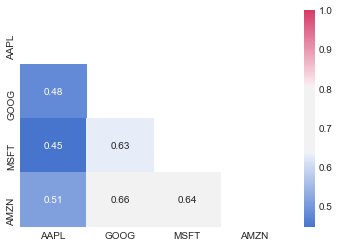

In [31]:
corr = tech_rets.dropna().corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap=sns.diverging_palette(256, 0, sep=80, n=7, as_cmap=True), annot=True, mask=mask)

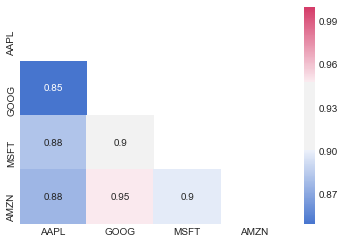

In [32]:
corr = closing_df.dropna().corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap=sns.diverging_palette(256, 0, sep=80, n=7, as_cmap=True), annot=True, mask=mask)

# GOOG and MSFT are highly correlated. Intuitively, it makes sense that all technology stocks are positively correlated.

In [33]:
# Risk is the standard deviation of the daily returns.
rets = tech_rets.dropna()

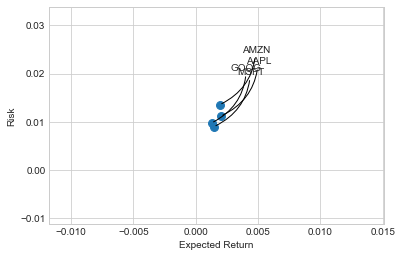

In [34]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(), s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, xy = (x, y), xytext = (50, 50), textcoords = 'offset points',
        ha = 'right', va = 'bottom', arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad=-0.3'))
    
# We would typically like a stock to have a high expected return and a low risk. In this case, AAPL might be the best choice.
# We don't want a negative expected return with high risk, because that would mean that the stock has a high standard deviation.
# The game of the stock market occurs when a stock has a high expected return, but also a high risk.

C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


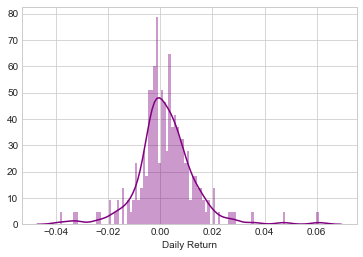

In [35]:
# Value at risk
# We can treat value at risk as the amount of money we could expect to lose 
# (aka putting at risk) for a given confidence interval. There are several 
# methods we can use for estimating a value at risk.

# Bootstrap method to calculate the empirical quantiles from a histogram of daily returns.

sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [36]:
rets.head()

,AAPL,GOOG,MSFT,AMZN
2017-01-04,-0.001050,0.000967,-0.004454,0.004657
2017-01-05,0.005079,0.009061,0.000000,0.030732
2017-01-06,0.011066,0.015264,0.008654,0.019912
2017-01-09,0.009221,0.000620,-0.003173,0.001168
2017-01-10,0.001025,-0.002293,-0.000325,-0.001280


In [39]:
rets['AAPL'].quantile(0.05)
# This means that the 0.05 empirical quantile. With 95% confidence, the worst daily loss would not exceed 1.4%.
# This is the value at risk.
# 95% of simulations, your worst daily loss would not exceed 1.4%.

AAPL    0.002018
GOOG    0.001285
MSFT    0.001469
AMZN    0.001938
dtype: float64

In [40]:
# We will use the geometric Brownian motion (GBM), which is technically known as a Markov process.
# This means that the stock price follows a random walk and is consistent
# with (at the very least) the weak form of the efficient market hypothesis (EMH):
# past price information is already incorporated and the next price movement is "conditionally independent"
# of past price movements.
# Past information of a price is independent of the future price.
# Future behaviour can't be predicted solely on past behaviour.

days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [41]:
def stock_monte_carlo(start_price, days, mu, sigma):
    
    price = np.zeros(days) # Array of zero's with length of days
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1, days):
        
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1]*(drift[x] + shock[x]))
        
    return price
    

In [42]:
GOOG.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2017-01-03,778.81,789.630,775.800,786.14,1605446,0
2017-01-04,788.36,791.340,783.160,786.90,1052125,0
2017-01-05,786.08,794.480,785.020,794.03,1114512,0
2017-01-06,795.26,807.900,792.204,806.15,1567821,0
2017-01-09,806.40,809.966,802.830,806.65,1230371,0


Text(0.5,1,'Monte Carlo Analysis for Google')

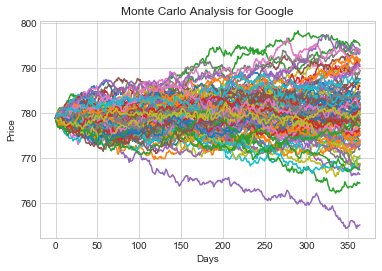

In [43]:
start_price = 778.81

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [47]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1] # Getting the final price of the simulation

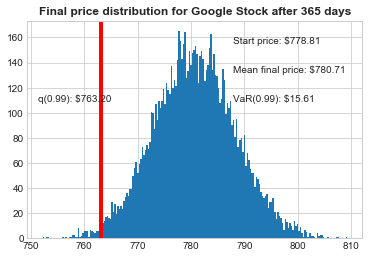

In [50]:
q = np.percentile(simulations, 1)  # 99% of the values should fit in the output

plt.hist(simulations, bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

# Histogram of all the final prices. This shows that the stock is fairly stable.
# As we saw in Risk vs. Expected Returns plot, the expected returns was close to 0.
# 99% of the time, the amount of money you would lose at most is the VaR, $15.61.